In [2]:
import kaggle

In [5]:
!kaggle competitions download -c dogs-vs-cats

100%|███████████████████████████████████████▉| 812M/812M [00:00<00:00, 2.00GB/s]
100%|████████████████████████████████████████| 812M/812M [00:00<00:00, 2.03GB/s]


In [6]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [7]:
!unzip train.zip

Archive:  train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  inflating: train/cat.10018.jpg     
  inflatin

In [9]:
import os

path = "../data/dogs-vs-cats/train/"
os.listdir(path)

['dog.6521.jpg',
 'cat.10580.jpg',
 'dog.6606.jpg',
 'dog.8055.jpg',
 'cat.7981.jpg',
 'dog.7420.jpg',
 'cat.173.jpg',
 'dog.4873.jpg',
 'cat.6645.jpg',
 'cat.9337.jpg',
 'cat.5986.jpg',
 'dog.11560.jpg',
 'cat.5691.jpg',
 'cat.8703.jpg',
 'cat.1376.jpg',
 'dog.2648.jpg',
 'cat.2111.jpg',
 'dog.11142.jpg',
 'dog.7622.jpg',
 'dog.8124.jpg',
 'dog.10968.jpg',
 'cat.9342.jpg',
 'dog.10566.jpg',
 'dog.9182.jpg',
 'dog.8029.jpg',
 'cat.6260.jpg',
 'dog.7488.jpg',
 'cat.2160.jpg',
 'dog.7166.jpg',
 'cat.3938.jpg',
 'cat.8906.jpg',
 'cat.7029.jpg',
 'dog.497.jpg',
 'cat.1992.jpg',
 'dog.2105.jpg',
 'cat.2662.jpg',
 'dog.9580.jpg',
 'dog.12161.jpg',
 'cat.3494.jpg',
 'dog.9176.jpg',
 'dog.1137.jpg',
 'cat.1716.jpg',
 'cat.9126.jpg',
 'dog.2855.jpg',
 'cat.7549.jpg',
 'dog.8815.jpg',
 'dog.4455.jpg',
 'dog.6547.jpg',
 'dog.12495.jpg',
 'dog.10167.jpg',
 'dog.12182.jpg',
 'cat.209.jpg',
 'dog.641.jpg',
 'cat.10567.jpg',
 'cat.6720.jpg',
 'cat.2716.jpg',
 'cat.2449.jpg',
 'cat.7588.jpg',
 'cat.53

In [10]:
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

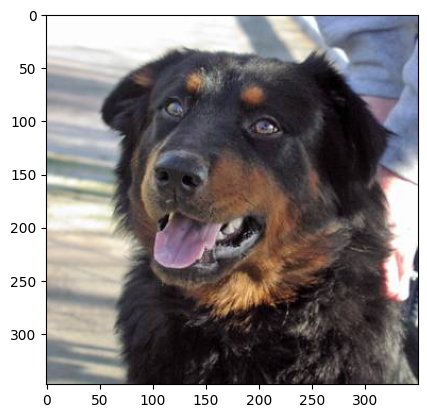

In [11]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample = random.choice(full_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()

In [12]:
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
image.shape

(352, 268, 3)

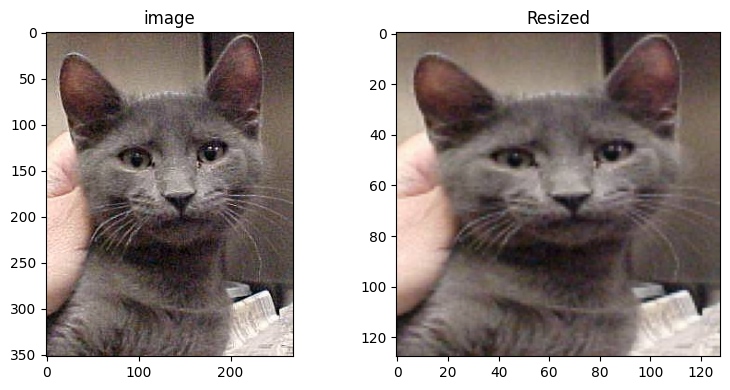

In [13]:
from skimage.transform import resize
resized = resize(image, (128,128,3))

fig, axes = plt.subplots(1, 2, figsize=(8,4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("image")
ax[1].imshow(resized, cmap=plt.cm.gray)
ax[1].set_title("Resized")

fig.tight_layout()
plt.show()

In [14]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(full_names)
for file in bar_total:
    image = mpimg.imread(path + file)
    images.append(resize(image, (32, 32, 3)))

images = np.array(images)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [15]:
images.shape, labels[:3]

((25000, 32, 32, 3), ['dog', 'cat', 'dog'])

In [16]:
images[:3]

array([[[[0.2897117 , 0.29188844, 0.32179379],
         [0.36247725, 0.34910102, 0.39340833],
         [0.32292194, 0.31638164, 0.34866601],
         ...,
         [0.22748639, 0.23904029, 0.25775762],
         [0.24391509, 0.25555987, 0.27522148],
         [0.27127342, 0.27949758, 0.30352723]],

        [[0.27134117, 0.27753938, 0.29948486],
         [0.31874172, 0.31142232, 0.34587298],
         [0.3107421 , 0.30970958, 0.33803145],
         ...,
         [0.24171318, 0.24888463, 0.26734696],
         [0.24516535, 0.25599748, 0.27587341],
         [0.27420156, 0.28391761, 0.31380681]],

        [[0.2677899 , 0.26928907, 0.29568823],
         [0.28973618, 0.28267636, 0.31421676],
         [0.30685574, 0.30037337, 0.33278741],
         ...,
         [0.23527449, 0.23958519, 0.25953331],
         [0.25643726, 0.26160265, 0.28944099],
         [0.27542102, 0.27965206, 0.31411195]],

        ...,

        [[0.27545385, 0.32291183, 0.42444442],
         [0.27849357, 0.46583621, 0.65755239]

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([1, 0, 1]), array(['cat', 'dog'], dtype='<U3'))

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels_encoded, test_size=0.2, 
                     random_state=13, stratify=labels_encoded)

X_train.shape, X_test.shape

((20000, 32, 32, 3), (5000, 32, 32, 3))

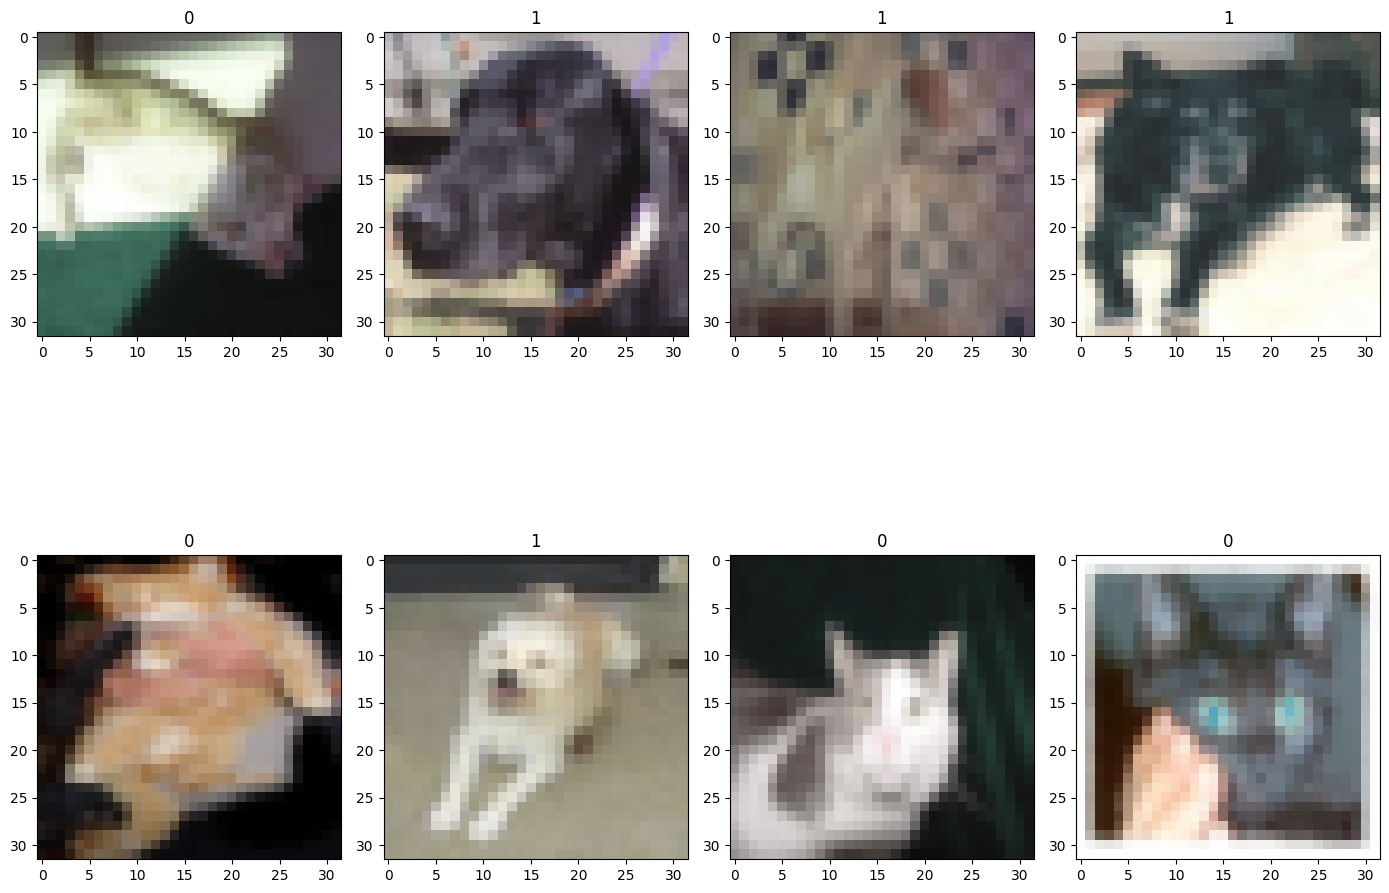

In [20]:
samples = random.choices(population=range(0, 20000), k=8)

plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx+1)
    plt.imshow(X_train[n], cmap='Greys',
               interpolation='nearest')
    plt.title(y_train[n])

plt.tight_layout()
plt.show()

In [21]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu",
                  input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(2, activation="softmax")
])

/home/kth/anaconda3/envs/dl_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747629097.882130   27807 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747629098.014828   27807 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747629098.015241   2

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,562 (6.20 MB)

 Trainable params: 1,626,562 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
import time

start_time = time.time()
hist = model.fit(X_train.reshape(20000, 32, 32, 3), y_train, 
                 validation_data=(X_test.reshape(5000, 32, 32, 3), y_test),
                 epochs=10, batch_size=100, verbose=1)
print('Fit time : ', time.time() - start_time)

Epoch 1/10


2025-05-19 13:34:11.625422: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 245760000 exceeds 10% of free system memory.
2025-05-19 13:34:11.767601: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 245760000 exceeds 10% of free system memory.
I0000 00:00:1747629252.841975   36143 service.cc:146] XLA service 0x79cb3c0057b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747629252.841996   36143 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-05-19 13:34:12.889512: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-19 13:34:13.053202: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


 60/200 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5078 - loss: 0.7252

I0000 00:00:1747629255.567400   36143 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5507 - loss: 0.6919

2025-05-19 13:34:16.190471: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.
2025-05-19 13:34:16.227063: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.


200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5510 - loss: 0.6917 - val_accuracy: 0.6888 - val_loss: 0.5932
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7020 - loss: 0.5800 - val_accuracy: 0.7378 - val_loss: 0.5235
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7413 - loss: 0.5236 - val_accuracy: 0.7638 - val_loss: 0.4907
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7610 - loss: 0.4934 - val_accuracy: 0.7774 - val_loss: 0.4687
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7827 - loss: 0.4602 - val_accuracy: 0.7790 - val_loss: 0.4702
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7937 - loss: 0.4466 - val_accuracy: 0.7906 - val_loss: 0.4457
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8071 - loss: 0.4192 - val_accuracy: 0.7898 - val_loss: 0.4419
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8141 - loss: 0.4020 - val_accuracy: 0.7950 - val_

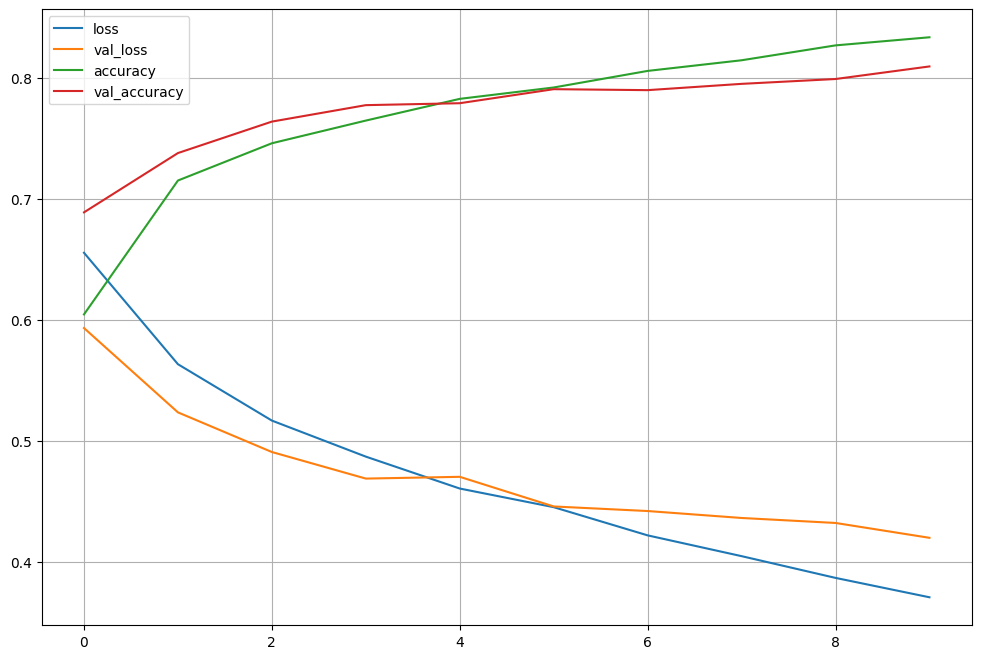

In [26]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [27]:
import os
import shutil

path = '../data/dogs-vs-cats/train/'
classes = ['cat', 'dog']

for class_name in classes:
    class_path = os.path.join(path, class_name)
    os.makedirs(class_path, exist_ok=True)
    for file in full_names:
        if class_name in file:
            shutil.move(os.path.join(path, file), os.path.join(class_path, file))

In [35]:
import tensorflow as tf
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)

In [36]:
batch_size = 32

train_generator = datagen.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 20000 images belonging to 2 classes.


In [37]:
validation_generator = datagen.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 5000 images belonging to 2 classes.


In [38]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu",
                  input_shape=(128,128,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(2, activation="softmax")
])

/home/kth/anaconda3/envs/dl_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model.fit(
    train_generator,
    #steps_per_epoch=train_generator.samples,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.8475 - loss: 0.3488 - val_accuracy: 0.8136 - val_loss: 0.3974
Epoch 2/5
  5/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.8270 - loss: 0.3736

2025-05-19 13:53:17.122179: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 4738022731605238241
2025-05-19 13:53:17.122204: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3358186626174718645


625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.8712 - loss: 0.3014 - val_accuracy: 0.8286 - val_loss: 0.3835
Epoch 3/5
  5/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.8916 - loss: 0.2392

2025-05-19 13:53:39.210055: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 4738022731605238241
2025-05-19 13:53:39.210079: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3358186626174718645


625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.8931 - loss: 0.2547 - val_accuracy: 0.8310 - val_loss: 0.4004
Epoch 4/5
  5/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9221 - loss: 0.2195

2025-05-19 13:54:00.950693: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 4738022731605238241
2025-05-19 13:54:00.950741: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3358186626174718645


625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.9194 - loss: 0.1998 - val_accuracy: 0.8280 - val_loss: 0.4498
Epoch 5/5
  5/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.9639 - loss: 0.1040

2025-05-19 13:54:22.491418: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 4738022731605238241
2025-05-19 13:54:22.491442: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3358186626174718645


625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.9360 - loss: 0.1627 - val_accuracy: 0.8212 - val_loss: 0.4785


2025-05-19 13:54:44.421152: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 4738022731605238241
2025-05-19 13:54:44.421175: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3358186626174718645
